# Lagrange Interpolation (Numerical Modelling) ESN-421

Name: Prahlad Mittal   Enr: 20411023   Branch: GPT 4th Yr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
def lagrange_interp(xi, yi, x):
    n = len(xi)                 # Number of data points
    P_x = np.zeros_like(x)      # Initialized interpolated values
    
    for k in range(len(x)):
        weights = np.ones(n)     # Initialize weights for Lagrange interpolation
        
        # Calculate weights using Lagrange formula
        for i in range(n):
            indices = []           # Initialize indices for excluding the current index i
            
            for j in range(n):
                if j != i:         # Exclude the current index i
                    indices.append(j)
            
            # Calculate the numerator and denominator terms for the Lagrange weight
            num = x[k] - xi[indices]             # (x - x_j) 
            den = xi[i] - xi[indices]          # (x_i - x_j) 
            weights[i] = np.prod(num / den)
        
        # Calculate the interpolated value at x[k]
        P_x[k] = np.sum(weights * yi)
    
    return P_x

In [4]:
# Example testing

n = 10
xi = np.linspace(-1, 1, n)
x = np.linspace(-1, 1, 1000)
yi = np.array([3, 2, 2, 1, 0, -3, -4, 1, 2, 4])  #given

# Interpolate using Lagrange interpolation
lagrange_y = lagrange_interp(xi, yi, x)

In [5]:
# Linear interpolation (scipy)
linear_interp = interp1d(xi, yi, kind='linear')
linear_y = linear_interp(x)

In [6]:
# Cubic spline interpolation (scipy)
cubic_interp = interp1d(xi, yi, kind='cubic')
spline_y = cubic_interp(x)

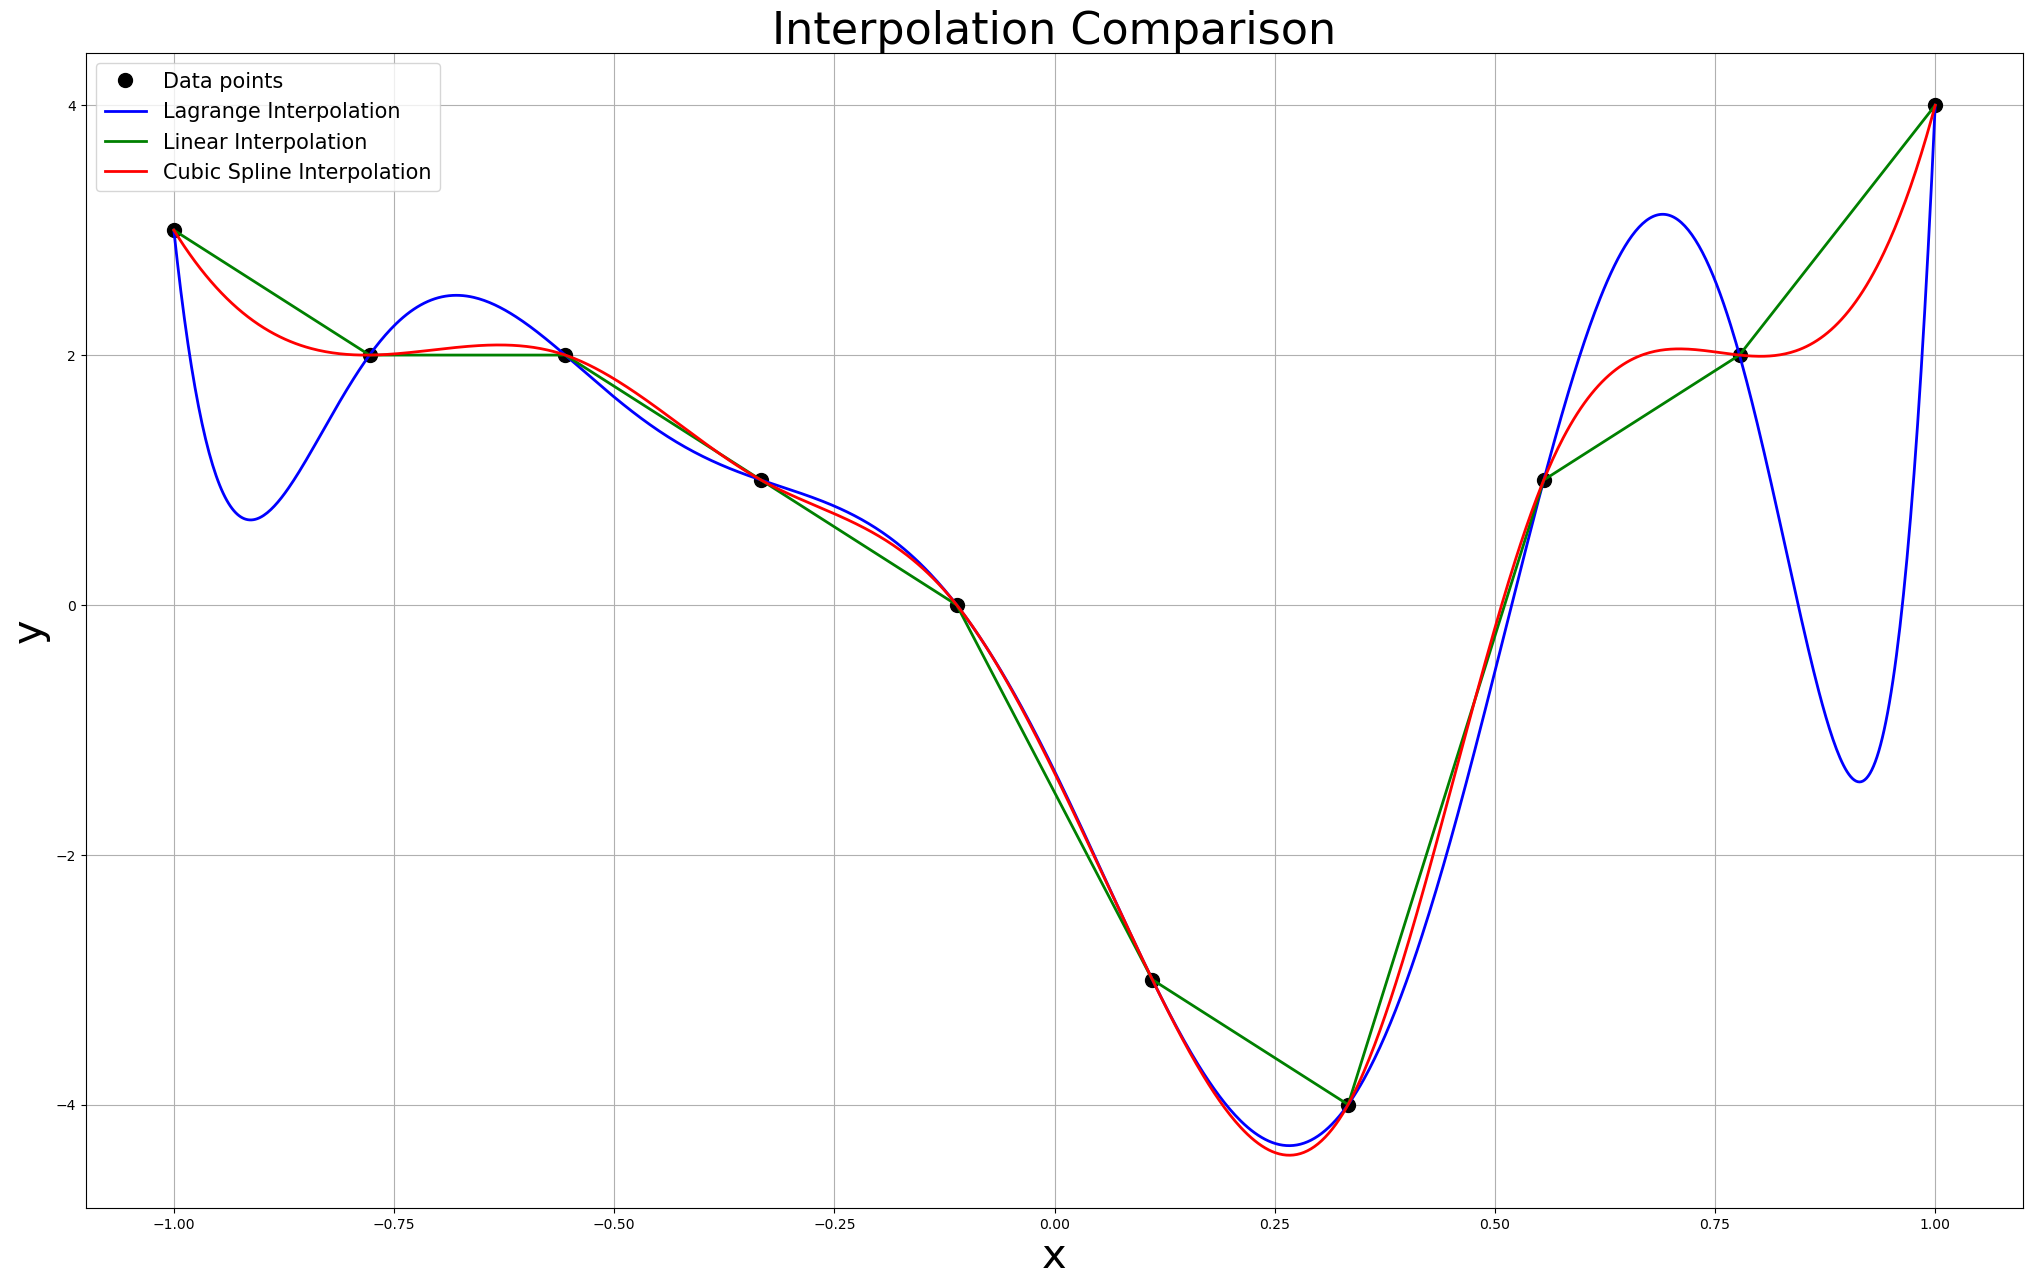

In [10]:
# Plot and comparison

plt.figure(figsize=(25, 15))

plt.plot(xi, yi, 'ko', markersize=10, label='Data points')
plt.plot(x, lagrange_y, 'blue', linewidth=2, label='Lagrange Interpolation')
plt.plot(x, linear_y, 'green', linewidth=2, label='Linear Interpolation')
plt.plot(x, spline_y, 'red', linewidth=2, label='Cubic Spline Interpolation')

plt.legend(fontsize=15)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.title('Interpolation Comparison', fontsize=32)
plt.grid(True)
plt.show()